# Estimation on simulated data using MSM

In [1]:
from consav import runtools
runtools.write_numba_config(disable=0,threads=4)

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Local modules
from Model import RetirementClass
import figs
import SimulatedMinimumDistance as SMD

# Global modules
import numpy as np
import time
import matplotlib.pyplot as plt

# Singles

In [2]:
Single = RetirementClass(simN=int(1e6),simT=68-57+1)
Single.solve()
Single.simulate()

### Simulate data

In [14]:
mom_data = SMD.MomFunSingle(Single.sim,Single.par)
mom_se = SMD.MomFunSingle(Single.sim,Single.par,calc='std')
weight = SMD.weight_matrix_single(mom_se,fac_up=1.5,scale_down=[58,59],fac_down=4)

Weight matrix

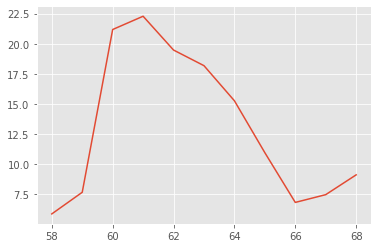

In [15]:
plt.plot(np.arange(58,69),np.mean(np.diag(weight).reshape(11,8),axis=1))
plt.show()

Moments

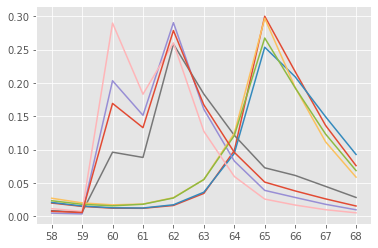

In [16]:
plt.plot(mom_data.reshape(11,8))
plt.xticks(np.arange(11),np.arange(58,69))
plt.show()

### Set up model for estimation

In [17]:
Single.par.sim_seed = Single.par.sim_seed + 1 # set new seed for estimation
Single.recompute()

In [18]:
# function to generate moments
def mom_fun(sim):
    return SMD.MomFunSingle(sim,Single.par)

In [22]:
par = Single.par
true = np.array([par.alpha_0_male, par.alpha_0_female, par.alpha_1, par.sigma_eta])
est_par = ["alpha_0_male", "alpha_0_female", "alpha_1", "sigma_eta"]

# Setup estimation
smd = SMD.SimulatedMinimumDistance(Single,mom_data,mom_fun)
smd.est_par = est_par

### Objective as a function of N

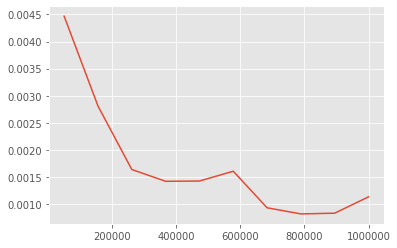

In [20]:
N = []
obj = []
for n in np.linspace(5e4, 1e6, 10):
    Single.par.simN = int(n)
    Single.recompute()
    obj.append(smd.obj_fun(true,weight))
    N.append(n)
plt.plot(N,obj)

Set up new model with N=700.000

In [21]:
Single.par.simN = int(7e5)
Single.recompute()
smd.model = Single
smd.obj_fun(true,weight)

0.0006688768009513639

### Run estimation

In [23]:
true

array([0.4  , 0.4  , 0.053, 0.435])

In [ ]:
theta0 = [(0.1, 0.1, 0.1, 0.5),
          (0.3, 0.3, 0.3, 0.5),
          (0.5, 0.5, 0.5, 0.5),
          (0.1, 0.1, -0.1, 0.5),
          (0.3, 0.3, -0.3, 0.5)]

In [ ]:
smd.MultiStart(theta0,weight)
theta = smd.est

In [ ]:
Nobs = 1
smd.std_error(theta,weight,Nobs=Nobs,Nsim=1)#,Nsim=Single.par.simN/Nobs)
std_error = smd.std

### Results

In [ ]:
print('Parameter:', est_par)
print('True:     ', np.round(true, 4))
print('Estimated:', np.round(theta, 4))
print('Bias:     ', np.round(theta-true, 4))
print('Std error:', std_error)

### clean up

In [24]:
%reset -f

# Couples

In [25]:
from consav import runtools
runtools.write_numba_config(disable=0,threads=4)

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Local modules
from Model import RetirementClass
import figs
import SimulatedMinimumDistance as SMD

# Global modules
import numpy as np
import time
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
CoupleEst,SingleEst = SMD.load_est(name='Couple',couple=True)
CoupleEst['simT'] = 68-53+1
CoupleEst['simN'] = int(1e6)
Couple = RetirementClass(couple=True, single_kwargs=SingleEst, **CoupleEst)
Couple.solve()
Couple.simulate()

### Remove income uncertainty

In [28]:
Couple.par.Nxi = 1
Couple.par.Nxi_men = 1
Couple.par.Nxi_women = 1
Couple.Single.par.Nxi = 1
Couple.par.var[:] = 0
Couple.par.cov = 0
Couple.Single.par.var[:] = 0
Couple.solve(recompute=True)
Couple.simulate()

### Simulate data

In [31]:
mom_data = SMD.MomFunCouple(Couple.sim,Couple.par)
mom_se = SMD.MomFunCouple(Couple.sim,Couple.par,calc='std')
weight = SMD.weight_matrix_couple(mom_se)

Weight matrix

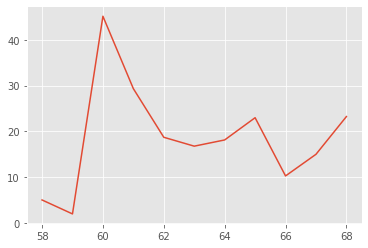

In [32]:
plt.plot(np.arange(58,69),np.mean(np.diag(weight).reshape(2,11,25),axis=(0,2)))
plt.show()

Moments - Women

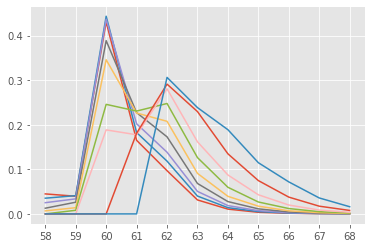

In [33]:
plt.plot(mom_data.reshape(2,11,25)[1,:,:9])
plt.xticks(np.arange(11),np.arange(58,69))
plt.show()

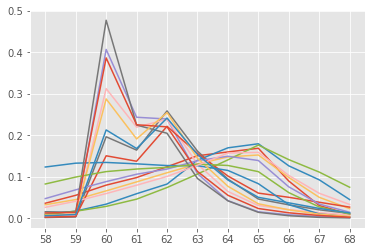

In [34]:
plt.plot(mom_data.reshape(2,11,25)[1,:,9:])
plt.xticks(np.arange(11),np.arange(58,69))
plt.show()

Moments - Men

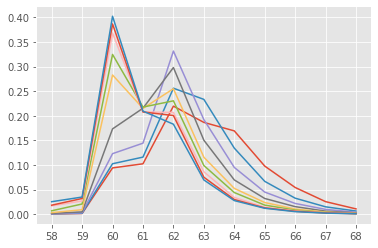

In [35]:
plt.plot(mom_data.reshape(2,11,25)[0,:,:9])
plt.xticks(np.arange(11),np.arange(58,69))
plt.show()

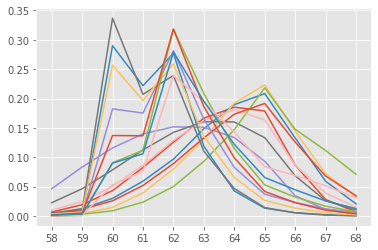

In [36]:
plt.plot(mom_data.reshape(2,11,25)[0,:,9:])
plt.xticks(np.arange(11),np.arange(58,69))
plt.show()

### Set up model for estimation

In [37]:
Couple.par.sim_seed = Couple.par.sim_seed + 1 # set new seed
Couple.solve(recompute=True)

In [38]:
# function to generate moments
def mom_fun(sim):
    return SMD.MomFunCouple(sim,Couple.par)

In [39]:
par = Couple.par
true = np.array([par.alpha_0_male, par.alpha_0_female, par.alpha_1, par.sigma_eta, 
                 par.phi_0_male, par.phi_0_female, par.phi_1])

In [42]:
est_par = ["alpha_0_male", "alpha_0_female", "alpha_1", "sigma_eta", "phi_0_male", "phi_0_female", "phi_1"]
smd = SMD.SimulatedMinimumDistance(Couple,mom_data,mom_fun)
smd.est_par = est_par
#smd.options['adaptive'] = True

### Objective as a funcion of N

50000.0 1.7621713662417593
155555.55555555556 0.5077000327151628
261111.11111111112 0.3517127007476501
366666.6666666667 0.26598081330970824
472222.22222222225 0.139001469631418
577777.7777777778 0.19651461580540075
683333.3333333334 0.1347405682775371
788888.888888889 0.14248084150476112
894444.4444444445 0.1292615850743043
1000000.0 0.12053885558723644


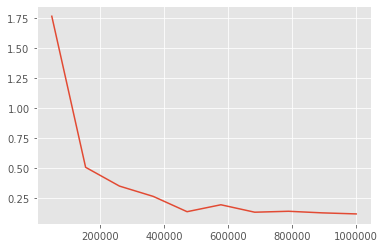

In [43]:
N = []
obj = []
for n in np.linspace(5e4, 1e6, 10):
    Couple.par.simN = int(n)
    Couple.recompute()
    y = smd.obj_fun(true,weight)
    obj.append(y)
    N.append(n)
    print(n,y)
plt.plot(N,obj)

Set new model with N=500.000

In [44]:
Couple.par.simN = int(5e5)
Couple.recompute()
Couple.Single.recompute()
smd.model = Couple

In [45]:
smd.obj_fun(true,weight)

0.19343777701146073

### Run estimation (only phi)

In [50]:
smd.est_par = est_par[3:]

In [51]:
true[3:]

array([ 0.435,  1.187,  1.671, -0.621])

In [52]:
theta0 = [(0.5, 1.0, 1.0, 0.5),
          (0.5, 1.5, 1.5, -0.5),
          (0.5, 0.5, 0.5, 0.5),
          (0.5, 1.0, 1.0, -0.5)]

In [53]:
smd.MultiStart(theta0,weight)
theta = smd.est

KeyboardInterrupt: 

In [ ]:
Nobs = 1
smd.std_error(theta,weight,Nobs=Nobs,Nsim=1)#,Nsim=Couple.par.simN/Nobs)
std_error = smd.std

In [ ]:
print('Parameter:', est_par)
print('True:     ', np.round(true, 4))
print('Estimated:', np.round(theta, 4))
print('Bias:     ', np.round(theta-true, 4))
print('Std error:', std_error)

### Run estimation (only alpha)

In [ ]:
smd.obj_fun(true[4:],weight) # reset parameters
smd.est_par = est_par[:4]

In [ ]:
theta0 = [(0.2, 0.2, 0.2, 0.5),
          (0.5, 0.5, 0.2, 0.5),
          (1.0, 1.0, 0.3, 0.5),
          (0.5, 0.5, -0.2, 0.5)]

In [ ]:
smd.MultiStart(theta0,weight)
theta = smd.est

In [ ]:
Nobs = 1
smd.std_error(theta,weight,Nobs=Nobs,Nsim=1)#,Nsim=Couple.par.simN/Nobs)
std_error = smd.std

In [ ]:
print('Parameter:', est_par)
print('True:     ', np.round(true, 4))
print('Estimated:', np.round(theta, 4))
print('Bias:     ', np.round(theta-true, 4))
print('Std error:', std_error)

### Run estimation (all)

In [ ]:
smd.est_par = est_par
smd.obj_fun(true,weight) # reset parameters

In [70]:
theta0 = [true,
         [0.5, 0.5, 0.2, 0.5, 1.0, 1.0, -0.5],
         [0.3, 0.3, -0.2, 0.5, 1.5, 1.5, -0.1],
         [0.5, 0.5, 0.1, 0.5, 1.1, 1.6, -0.6]]          

In [71]:
smd.MultiStart(theta0,weight)
theta = smd.est

1 estimation:
success: True | feval: 447 | time: 90.0 min | obj: 0.15300221117291887
start par: (0.2, 0.2, 0.2, 0.5, 1.0, 1.0, 0.5)
par:       [ 0.36648985  0.43786361 -0.08468231  0.44987292  1.6022865   1.29248873
  0.14221061]

2 estimation:
success: True | feval: 416 | time: 83.6 min | obj: 0.18921849550172282
start par: (0.5, 0.5, 0.2, 0.5, 1.5, 1.5, -0.5)
par:       [ 0.47406804  0.41813469  0.18449383  0.40877306  1.10086574  1.14033018
 -0.82283856]

3 estimation:
success: True | feval: 562 | time: 113.2 min | obj: 0.2722175968990571
start par: (1.0, 1.0, 0.3, 0.5, 0.5, 0.5, 0.5)
par:       [ 0.52431878  0.51245508 -0.1093807   0.42247923  0.83407836  0.85917162
  0.17151085]

4 estimation:
success: True | feval: 454 | time: 91.3 min | obj: 0.10262387832022246
start par: (0.5, 0.5, -0.2, 0.5, 1.0, 1.0, -0.5)
par:       [ 0.38737057  0.37865998  0.03349244  0.43891824  1.90566008  1.20600282
 -0.59545089]

final estimation:
success: True | feval: 829 | obj: 0.10001732549699688
t

In [ ]:
Nobs = 1
smd.std_error(theta,weight,Nobs=Nobs,Nsim=1)#,Nsim=Couple.par.simN/Nobs)
std_error = smd.std

In [73]:
print('Parameter:', est_par)
print('True:     ', np.round(true, 4))
print('Estimated:', np.round(theta, 4))
print('Bias:     ', np.round(theta-true, 4))
print('Std error:', std_error)

Parameter: ['alpha_0_male', 'alpha_0_female', 'alpha_1', 'sigma_eta', 'phi_0_male', 'phi_0_female', 'phi_1']
True:      [ 0.4    0.4    0.053  0.435  1.187  1.671 -0.621]
Estimated: [ 0.3885  0.3795  0.0316  0.4402  1.8566  1.2415 -0.5803]
Bias:      [-0.0115 -0.0205 -0.0214  0.0052  0.6696 -0.4295  0.0407]
Std error: [0.00340467 0.00514178 0.00265296 0.00107917 0.03414116 0.00025834
 0.01332987]
